# Profitable App Profiles on App Store and Google Play

The objetive of this project is to know which app profiles generate the most profits on App Store and Google Play market.This information will help the company to make decisions about which kind of apps to build. 

Something to keep in mind is that the company makes free apps, so most of the profit comes from in-app ads. The data that will mainly help with the problem is the number of users on the apps. If an app has more users, the more the ads are seen and engaged with. Our goal will be to analyse the data in order to know which kind of apps attract more users. 

## 1. Opening and Exploring Data

We will be analysing two datasets:
- A dataset containing 10,000 Android apps from Google Play (collected in: August 2018)
- A dataset containing 7,000 Android apps from App Store (collected in: July 2017)

In order to do so, we will first open the data

In [1]:
from csv import reader 

import matplotlib.pyplot as plt
import pandas as pd

#Open App Store data 
opened_file = open("AppleStore.csv")
read_file = reader(opened_file)
apple = list(read_file) #we are saving all data on a list of lists
apple_header = apple[0] #we do this to save time when defining the function explore_data
apple = apple[1:]

#Open Google Play data
opened_file = open("googleplaystore.csv")
read_file = reader(opened_file)
android = list(read_file) #we are saving all data on a list of lists
android_header = android[0] #we do this to save time when defining the function explore_data
android = android[1:]


To help us analyse data better, we creat a function that allow us to print the rows we want from any slice of data as well as the number of rows and columns. 

In [2]:
def explore_data(dataset, start, end, rows_and_columns=False): #dataset does NOT include header row
    dataset_slice=dataset[start:end] #this allow us to pick any slice of data we want. 
    for row in dataset_slice:
        print(row)
        print('\n')
    if rows_and_columns: #If we put it in "True" it will tell the number of rows and columns
        print('Number of rows: ', len(dataset))
        print('Number of columns: ', len(dataset[0]))

In [3]:
print(apple_header) #shows column names from apple dataset.
print('\n')
explore_data(apple, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows:  7197
Number of columns:  16


The columns that seem interesting in the Apple Store dataset are:
- track name to know if they are English apps
- currency and price to know if they are free or not
- rating_count_tot and rating_count_ver to know the rating of the app. 
- prime_genre to know the type of app

In [4]:
print(android_header) #shows column names from apple dataset.
print('\n')
explore_data(android, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows:  10841
Number of columns:  13


The columns that seem interesting in the Google Play dataset are:
- 'App' to know if it's English
- 'Category' 'Type' and 'Genres'  to know which kind of app it is. 
- 'Installs' and 'Reviews' to know its popularity and use. 
- 'Price' to know if it's free or not. 

## 2. Data Cleaning

### 2.1. Deleting Wrong Data

In a discussion they talk about an error in a certain row, we have to find where that error is. After readingthe discussion, the error is in row number 10472. To know exactly where the error is inside this row, we will print it. 

In [5]:
print(android_header)
print('\n')
print(android[10472])

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


You can see the 'Category' is missing, skipping from App to Rating. You can either delete the row or, as another user says, find the app and add the missing category. In this case, we will be deleting the data by using the del function.

In [6]:
print(len(android))
del(android[10472])
print(len(android))

10841
10840


### 2.2 Removing Duplicates

There is no wrong data in Apple Store dataset. But now we want to check if there are any duplicates on both datasets. In order to do it efficiently, we will create and function that helps us know which apps are duplicated.  

In [7]:
def duplicates(dataset):
    unique_apps=[]
    duplicated_apps=[]
    for row in dataset:
        if row[0] in unique_apps:
            duplicated_apps.append(row[0]) #if it's already in unique apps lists, we add to duplicate
        else: #otherwise, we'll put it on unique apps lists. 
            unique_apps.append(row[0])
    
    print("The number of duplicated apps is: ", len(duplicated_apps))
    print("\n")
    print("Examples of duplicated apps:", duplicated_apps[0:5])
            

In [8]:
duplicates(android) #to see an example with google apps 

The number of duplicated apps is:  1181


Examples of duplicated apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings']


To know which criteria to use to delete the extra duplicates, we are going to show all of the rows that contain the App 'Quick PDF Scanner + OCR FREE' in Google Store:  

In [9]:
print(android_header)
print("\n")
for row in android:
    if row[0] =='Quick PDF Scanner + OCR FREE':
        print(row)
        print("\n")

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Quick PDF Scanner + OCR FREE', 'BUSINESS', '4.2', '80805', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'February 26, 2018', 'Varies with device', '4.0.3 and up']


['Quick PDF Scanner + OCR FREE', 'BUSINESS', '4.2', '80805', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'February 26, 2018', 'Varies with device', '4.0.3 and up']


['Quick PDF Scanner + OCR FREE', 'BUSINESS', '4.2', '80804', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'February 26, 2018', 'Varies with device', '4.0.3 and up']




If we take a closer look, we can see that the difference is in the number of reviews. To have a better conclusion of which apps are the ones with most views, we should keep only the one with the most reviews (Note: The column 'Review' is row number 3) 

We will do this with both datasets. 

In [10]:
#Google Play dataset 
review_max = {}
for row in android:
    name = row[0] #name of the app 
    n_reviews = float(row[3]) #number of reviews
    if name not in review_max: #if its not on the list, you add it
        review_max[name] = n_reviews
    if name in review_max and n_reviews > review_max[name]: #if it is and the new number of reviews is bigger,you change it
        review_max[name] = n_reviews 

print('The number of entries is:', len(review_max))
    

The number of entries is: 9659


Once we have the dictionary with all the apps duplicates and the max number of reviews, we have to delete from the dataset the other duplicates with less number of reviews. We're gonna do the following:
- Create 2 empty lists: one two save the cleaned data (android_clean) and other to save the apps already added in the new dataset (already_added)
- Loop over the android data set, saving the app and the number of reviews. If the name is not already added and the number of reviews is the max saved in review_max dictionary, then you add it to android_clean

In [11]:
android_clean=[] #list that will save the correct data
already_added=[] #list that will save the apps added in android_clean

for row in android:
    name = row[0]
    n_reviews = float(row[3])
    if name not in already_added and n_reviews==review_max[name]:
        android_clean.append(row) 
        already_added.append(name)
print('The number of entries is:', len(android_clean))
print("\n")
print(android_header)
print("\n")
explore_data(android_clean,0,5,True)

The number of entries is: 9659


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'June 20, 2018', '1.1', '4.4 and up']


['Paper flowers instructions', 'ART_AND_DESIGN', '4.4', '167', '5.6M

Now we'll do the same but with the App Store dataset. 

In [12]:
#App store dataset 
duplicates(apple)

The number of duplicated apps is:  0


Examples of duplicated apps: []


We now made sure there are no duplicates in app store, so we will go onto the next step: removing non-english apps. 

### 2.3. Deleting non-english apps

 #### 2.3.1. Removing non-english characters

To know if the app is or is not english, we can check each character of a given string to know if it's an english character or not. To do that we use the in-built function ord() that returns a number for a given character. 

In [13]:
def englishapp(a_string):
    for character in a_string:
        number =ord(character)
        if number > 127:
            return False 
    return True            

In [14]:
#Now we check different strings 
print(englishapp('Instagram'))
print("\n")
print(englishapp('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print("\n")
print(englishapp('Docs To Go™ Free Office Suite'))
print("\n")
print(englishapp('Instachat 😜'))
print("\n")

True


False


False


False




#### 2.3.2. Removing emojis or similar characters

Since we don't want to lose data, we need a way to include characters such as emojis or other symbols. (Ex.'Instachat 😜' is an english app we would ignore just because ord(😜) is greater than 127. To solve this, we will consider non english the apps that have more than 3 characters greater than 127. 

In [15]:
def englishapp(a_string):
    total = 0 
    for character in a_string:
        number =ord(character)
        if number > 127:
            total+=1 
    if total > 3:
        return False
    else: return True       

We put now an example to see if it works 

In [16]:
print(englishapp('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print("\n")
print(englishapp('Instachat 😜'))
print("\n")

False


True




Now we create two new data sets, for Android and Apple, that save only the rows containing english functions.

In [17]:
eng_android=[]
eng_apple=[]

#Google Play
for row in android_clean:
    if englishapp(row[0]) == True:
        eng_android.append(row)

print(len(eng_android))

#App Store 
for row in apple:
    if englishapp(row[1]) == True:
        eng_apple.append(row)

print(len(eng_apple))

9614
6183


### 2.4. Isolating free apps 

To isolate free apps we must check the 'Price' column (row 4 in apple dataset and row 7 in Google Play dataset) We will add to a new list only the apps that have '0.0' for Apple Store and '0' for Google Play. 

In [18]:
#Google Play
free_eng_android=[]
for row in eng_android:
    price=row[7]
    if price=='0':
        free_eng_android.append(row)

print(len(free_eng_android))
        
#Apple 
free_eng_apple=[]
for row in eng_apple:
    price=row[4]
    if price=='0.0':
        free_eng_apple.append(row)

print(len(free_eng_apple))

8864
3222


## 3. Data Analysis

### 3.1. Determining most common apps by category and genre

In order to achieve our goal to gain profit in both markets, we should now the most frequent apps in BOTH dataset. That's why we must check the most common apps using genre as a filter. 

The columns used for the analysis are the following:
* Apple Store: `prime_genre` --> row 11
* Google Play: `Category` --> row 1 and `Genres` --> row 10 

#### 3.1.1. Defining frequency table function

In [19]:
def freq_table(dataset, index):
    table={}
    
    for row in dataset:
        genre=row[index]
        if genre in table:
            table[genre]+=1 
        else: 
            table[genre]=1
    
    table_percentages={}
    
    for row in table:
        percentage=( table[row]/sum(table.values()) ) * 100
        table_percentages[row]=percentage
    
    return table_percentages 

#### 3.1.2. Defining a table display function

In [20]:
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])
        

#### 3.1.3. Google Apps

In [21]:
print('The frequency table for Category in Google Apps is:')
display_table(free_eng_android, 1)
print('\n')


The frequency table for Category in Google Apps is:
FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021

Let's also show the results with an horizontal plot:

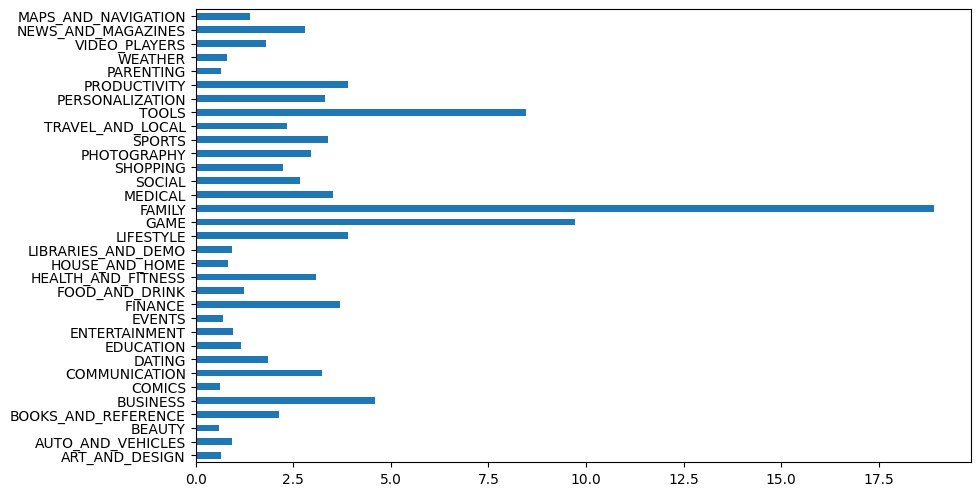

In [22]:
#Convert dictionary to dataframe
free_eng_android_set = freq_table(free_eng_android,1)
free_eng_android_set = pd.DataFrame.from_dict(free_eng_android_set, orient='index', columns = ['Frequency'])

#Represent
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)  #Make the plot a bigger size
free_eng_android_set['Frequency'].plot.barh()
plt.show()

In [23]:
print('The frequency table for Genre in Google Apps is:')
print('\n')
display_table(free_eng_android, 9)
print('\n')

The frequency table for Genre in Google Apps is:


Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0

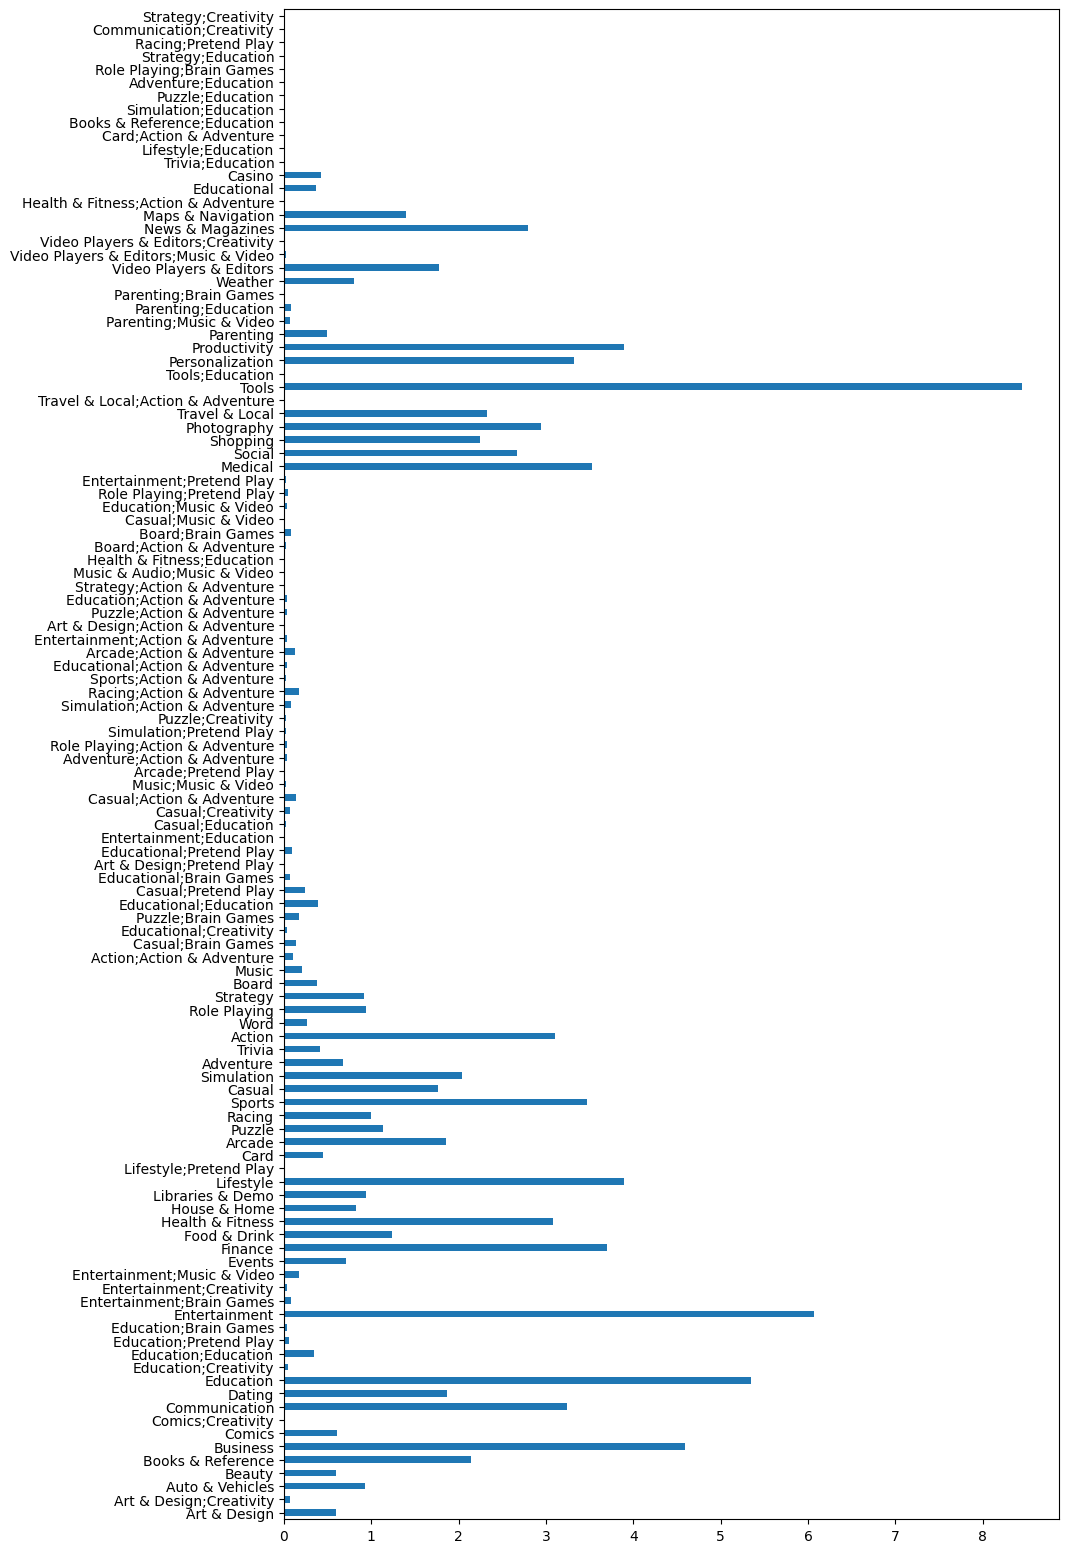

In [24]:
#Convert dictionary to dataframe
free_eng_android_genre = freq_table(free_eng_android,9)
free_eng_android_genre = pd.DataFrame.from_dict(free_eng_android_genre, orient='index', columns = ['Frequency'])

#Represent
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,20)  #Make the plot a bigger size
free_eng_android_genre['Frequency'].plot.barh()
plt.show()

#### HIGHLIGHTS
- Most common genre: Tools (8.45%)
- Other common genres: Entertainment (6.06%), Education (5.34%), Business, Productivity, Medical...
- Non common genres: Finance, Business, Book, Navigation... (All less than 1%)

- Most common category: Family
- Other common categories: GAMES, TOOLS, BUSINESS, LIFESTYLE...

#### 3.1.4. App Store

In [25]:
print('The frequency table for Prime_genere in App Store is:')
display_table(free_eng_apple, 11)
print('\n')

The frequency table for Prime_genere in App Store is:
Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665




#### HIGHLIGHTS
- Most common genre: Games (58.16%)
- Other common genres: Entertainment (7.88%), Photo & Video (4.96%), Social Networking, Shopping... 
- Non common genres: Business, Book, Navigation... (All less than 1%)

### Conclusions
 App Store seems to have mainly game and/or entertainment oriented apps, while Google Play has overall a much more balanced spectrum, beind in this case Tool and Productivity apps de most common. 

### 3.2. Most Popular Apps By Genre

To know which apps are the most popular apps we need to use:
- Installs column in the Google Play dataset (row number 5)
- The rating_count_tot in App Store dataset (row number 5)


#### 3.2.1. App Store

In [26]:
#use of the freq_table function to have number of apps classified by genre
apple_genres = freq_table(free_eng_apple, 11)

#now that we know each key represents a unique genre, we can loop over it to find the sum of
#ratings of each genre

avg_ratings_genre=[] #to make a list of lists containing all this info.

for genre in apple_genres: #first loop to go genre by genre 
    
    total = 0
    len_genre = 0
  
    for row in free_eng_apple: #nested loop over whole dataset
        genre_app=row[11]
        if genre_app == genre:
            ratings=float(row[5]) #saving the rating_count_tot to a variable
            total+=ratings #add up to the total
            len_genre+= 1 #add one extra app 
    
    avg_ratings=total/len_genre #average number of ratings by genre 
    print(genre, avg_ratings)
    avg_ratings_genre.append([genre, avg_ratings,total, len_genre])
           

Social Networking 71548.34905660378
Photo & Video 28441.54375
Games 22788.6696905016
Music 57326.530303030304
Reference 74942.11111111111
Health & Fitness 23298.015384615384
Weather 52279.892857142855
Utilities 18684.456790123455
Travel 28243.8
Shopping 26919.690476190477
News 21248.023255813954
Navigation 86090.33333333333
Lifestyle 16485.764705882353
Entertainment 14029.830708661417
Food & Drink 33333.92307692308
Sports 23008.898550724636
Book 39758.5
Finance 31467.944444444445
Education 7003.983050847458
Productivity 21028.410714285714
Business 7491.117647058823
Catalogs 4004.0
Medical 612.0


#### Recommendation 
According to most popular apps by genre, it would be appropiate to develope apps in the following genres: Navigation > Reference > Social Networking... 

Navigation has the biggest number of ratings yet they represent barely 0.19% of the total of apps analysed. Let's explore this results further:

In [27]:
for row in free_eng_apple:
    if row[11] == 'Navigation':
        print(row[1], row[5])

Waze - GPS Navigation, Maps & Real-time Traffic 345046
Google Maps - Navigation & Transit 154911
Geocaching® 12811
CoPilot GPS – Car Navigation & Offline Maps 3582
ImmobilienScout24: Real Estate Search in Germany 187
Railway Route Search 5


As you can see, the most known apps such as Waze and Google Maps have in total over half a million ratings, yet the other ones have barely. This happens in other genres where few apps have the mayority of ratings such as Social Networking (Twitter, Facebook, Pinterest)  or Music. That means that these genres may seem more popular than they really are. We should remove them in order to see the level of profit we should expect when introducing a new app.

Now let's explore the Reference apps. They have 74,942 user ratings on average:

In [28]:
for row in free_eng_apple:
    if row[11] == 'Reference':
        print(row[1], row[5])

Bible 985920
Dictionary.com Dictionary & Thesaurus 200047
Dictionary.com Dictionary & Thesaurus for iPad 54175
Google Translate 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition 17588
Merriam-Webster Dictionary 16849
Night Sky 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools 4693
GUNS MODS for Minecraft PC Edition - Mods Tools 1497
Guides for Pokémon GO - Pokemon GO News and Cheats 826
WWDC 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free 718
VPN Express 14
Real Bike Traffic Rider Virtual Reality Glasses 8
教えて!goo 0
Jishokun-Japanese English Dictionary & Translator 0


As you can see, the Bible and Dictionary.com skew up the average user rating. However, comparing to the different results in Navigation, many of the other apps in Reference have better user ratings. We could create an app based on a  book (other quite popular genre) where you can check for quotes, small stories or any other information about it. 

This is great also because, as we checked before, Apple Store is full of fun apps. Having a no-fun app will make it stand out more. 

Other popular genres, though not interesting based on what kind of app we want are: 

* Weather apps — this genre is not appropiate because people barely spend time on a weather app, so we wouldn't get any profit with ads. 
* Food & Drink apps — this genre requires cooking and delivey, which is outside the scope of our company. 
* Finance apps — this genre requires of expertise, and it's an extra cost that's not worth it. 


#### 3.1.2. Google Play

In [29]:
display_table(free_eng_android, 5) #install columns

1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


In [30]:
#use of the freq_table function to have number of apps classified by genre
android_categories = freq_table(free_eng_android, 1)

#now that we know each key represents a unique category, we can loop over it to find the sum of
#installs of each category

avg_ratings_category=[] #to make a list of lists containing all this info.

for category in android_categories: #first loop to go genre by genre 
    total = 0
    len_category = 0
    for row in free_eng_android: #nested loop over whole dataset
        category_app=row[1]
        if category_app == category:
            n_installs=row[5] #saving the rating_count_tot to a variable
            n_installs=n_installs.replace('+','')
            n_installs=n_installs.replace(',','')
            total+=float(n_installs) #add up to the total
            len_category+= 1 #add one extra app 
    
    avg_n_installs=total/len_category#average number of ratings by genre 
    print(category, ':', avg_n_installs)
    avg_ratings_category.append([category, avg_n_installs,total, len_category])

    
   

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

On average the app with most installs is COMMUNICATION, with a total of 38,456,119 installs. Let's explore it further...

In [31]:
for row in free_eng_android:
    if row[1] == 'COMMUNICATION':
        print(row[0], row[5])

WhatsApp Messenger 1,000,000,000+
Messenger for SMS 10,000,000+
My Tele2 5,000,000+
imo beta free calls and text 100,000,000+
Contacts 50,000,000+
Call Free – Free Call 5,000,000+
Web Browser & Explorer 5,000,000+
Browser 4G 10,000,000+
MegaFon Dashboard 10,000,000+
ZenUI Dialer & Contacts 10,000,000+
Cricket Visual Voicemail 10,000,000+
TracFone My Account 1,000,000+
Xperia Link™ 10,000,000+
TouchPal Keyboard - Fun Emoji & Android Keyboard 10,000,000+
Skype Lite - Free Video Call & Chat 5,000,000+
My magenta 1,000,000+
Android Messages 100,000,000+
Google Duo - High Quality Video Calls 500,000,000+
Seznam.cz 1,000,000+
Antillean Gold Telegram (original version) 100,000+
AT&T Visual Voicemail 10,000,000+
GMX Mail 10,000,000+
Omlet Chat 10,000,000+
My Vodacom SA 5,000,000+
Microsoft Edge 5,000,000+
Messenger – Text and Video Chat for Free 1,000,000,000+
imo free video calls and chat 500,000,000+
Calls & Text by Mo+ 5,000,000+
free video calls and chat 50,000,000+
Skype - free IM & video

We can see how WhatsApp Messenger, Messenger, Skype, Google Chrome have over 1 billion installs. Let's see what would happen if we removed all the apps with +100,000,000 installs.

In [32]:
under_100m_apps=[]
total=0
len_app=0

for row in free_eng_android:
    
    n_installs=row[5] 
    n_installs=n_installs.replace('+','')
    n_installs=n_installs.replace(',','')
    
    if (row[1]=='COMMUNICATION') and (float(n_installs)) < 100000000:
        print(row[0], ':', n_installs)
        under_100m_apps.append(float(n_installs))
        
print('\n')
avg_n_installs_under_100m=sum(under_100m_apps)/len(under_100m_apps)


print('The number of installs is {}'.format(avg_n_installs_under_100m))
print('\n')
print('The number of installs has decreased in:')
print(1-(avg_n_installs_under_100m/avg_ratings_category[6][1]))
        

Messenger for SMS : 10000000
My Tele2 : 5000000
Contacts : 50000000
Call Free – Free Call : 5000000
Web Browser & Explorer : 5000000
Browser 4G : 10000000
MegaFon Dashboard : 10000000
ZenUI Dialer & Contacts : 10000000
Cricket Visual Voicemail : 10000000
TracFone My Account : 1000000
Xperia Link™ : 10000000
TouchPal Keyboard - Fun Emoji & Android Keyboard : 10000000
Skype Lite - Free Video Call & Chat : 5000000
My magenta : 1000000
Seznam.cz : 1000000
Antillean Gold Telegram (original version) : 100000
AT&T Visual Voicemail : 10000000
GMX Mail : 10000000
Omlet Chat : 10000000
My Vodacom SA : 5000000
Microsoft Edge : 5000000
Calls & Text by Mo+ : 5000000
free video calls and chat : 50000000
Messaging+ SMS, MMS Free : 1000000
chomp SMS : 10000000
Glide - Video Chat Messenger : 10000000
Text SMS : 10000000
Talkray - Free Calls & Texts : 10000000
GroupMe : 10000000
mysms SMS Text Messaging Sync : 1000000
2ndLine - Second Phone Number : 1000000
Ninesky Browser : 1000000
Dolphin Browser - Fa

As you can see, the avg number of installs decreases greatly, about 90.63%. So it would not be appropiate to consider this genre, since it's difficult to compete against those companies

We see the same pattern for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps, photography apps, or productivity apps. 

The main concern is that these app genres might seem more popular than they really are. Moreover, they seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible. 

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play. 

In [33]:
for app in free_eng_android:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc.

However, it seems to be very few really popular apps. Most Let's confirm it by seeing how many surpass the 100,000,000 downloads: 

In [34]:
for app in free_eng_android:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] =='100,000,000+' 
                                            or app[5] =='500,000,000+' 
                                            or app[5] == '1,000,000,000+'):
        print(app[0], ':', app[5])
        

print()

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+



Let's continue just with the apps under 100,000,000 downloads.

In [35]:
for app in free_eng_android:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] !='100,000,000+' 
                                            or app[5] !='500,000,000+' 
                                            or app[5] != '1,000,000,000+'):
        print(app[0], ':', app[5])
        

print()

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

We can see that many of these apps are libraries or reading apps. We should develop an app with other features, to differenciate from the competitors. 

There are a few apps (7) about Al Quran, which tells us that making apps about a book can be useful. However, we should add features besides the raw book, such as: discussion forum, interesting quotes, quizzes etc. 

### 4. Conclusions

We can see that creating an app about a book can be profitable in both Apple Store and Google Play. Nevertheless, we should try to incorporate extra features like audio version, forum discussion etc. since both sites are full of libraries. 